In [ ]:
# # Data Dictionary
# # Variable Name	Description
# # LoanNr_ChkDgt	Identifier Primary key
# # Name	Borrower name
# # City	Borrower city
# # State	Borrower state
# # Zip	Borrower zip code
# # Bank	Bank name
# # BankState	Bank state
# # NAICS	North American industry classification system code
# # ApprovalDate	Date SBA commitment issued
# # ApprovalFY	Fiscal year of commitment
# # Term	Loan term in months
# # NoEmp	Number of business employees
# # NewExist	1 = Existing business, 2 = New business
# # CreateJob	Number of jobs created
# # RetainedJob	Number of jobs retained
# # FranchiseCode	Franchise code, (00000 or 00001) = No franchise
# # UrbanRural	1 = Urban, 2 = rural, 0 = undefined
# # RevLineCr	Revolving line of credit: Y = Yes, N = No
# # LowDoc	LowDoc Loan Program: Y = Yes, N = No
# # ChgOffDate	The date when a loan is declared to be in default
# # DisbursementDate	Disbursement date
# # DisbursementGross	Amount disbursed
# # BalanceGross	Gross amount outstanding
# # MIS_Status	Loan status charged off = CHGOFF, Paid in full =PIF
# # ChgOffPrinGr	Charged-off amount
# # GrAppv	Gross amount of loan approved by bank
# # SBA_Appv	SBA’s guaranteed amount of approved loan


# Description of the first two digits of NAICS.
# Sector	Description
# 11	Agriculture, forestry, fishing and hunting
# 21	Mining, quarrying, and oil and gas extraction
# 22	Utilities
# 23	Construction
# 31–33	Manufacturing
# 42	Wholesale trade
# 44–45	Retail trade
# 48–49	Transportation and warehousing
# 51	Information
# 52	Finance and insurance
# 53	Real estate and rental and leasing
# 54	Professional, scientific, and technical services
# 55	Management of companies and enterprises
# 56	Administrative and support and waste management and remediation services
# 61	Educational services
# 62	Health care and social assistance
# 71	Arts, entertainment, and recreation
# 72	Accommodation and food services
# 81	Other services (except public administration) 92 Public administration

In [1]:
import requests
import zipfile
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
# URL del dataset en Kaggle
url = "https://www.kaggle.com/api/v1/datasets/download/mirbektoktogaraev/should-this-loan-be-approved-or-denied"

# Descargamos el contenido
response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    print("Descarga completada ✅")
else:
    print("Error en la descarga:", response.status_code)

# Guardamos el zip en memoria
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Listamos los archivos dentro del zip
print("Archivos en el zip:", zip_file.namelist())

# Elegimos el CSV (ajustá el nombre según corresponda)
csv_filename = zip_file.namelist()[0]

# Leemos el CSV directamente desde el zip
df = pd.read_csv(zip_file.open(csv_filename))


pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# age={'18-29':1,'30-44':2,'45-60':3,
# '> 60':4,
# 'Response':0,
# np.nan:0}

Descarga completada ✅
Archivos en el zip: ['SBAnational.csv', 'Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf']


C:\Users\alejo\AppData\Local\Temp\ipykernel_25336\1773626935.py:30: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.


In [2]:
cash_econde=['GrAppv','SBA_Appv','ChgOffPrinGr','DisbursementGross','BalanceGross']

for col in cash_econde:
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)



In [3]:
df['NAICS'] = df['NAICS'].astype(str).apply(lambda x: x[:2])

naics_dict = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation and warehousing',
    '49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}
df['Industry'] = df['NAICS'].map(naics_dict)
df[['NAICS','Industry']].head()



,NAICS,Industry
0,45,Retail trade
1,72,Accommodation and food services
2,62,Health care and social assistance
3,0,NaN
4,0,NaN


In [4]:
# columnas de fechas a transformar
dates_encode = ['DisbursementDate', 'ApprovalDate']

# convertir a datetime
for col in dates_encode:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')
    
    df[col + '_day'] = df[col].dt.day.fillna(0).astype('int32')
    df[col + '_month'] = df[col].dt.month.fillna(0).astype('int32')
    df[col + '_year'] = df[col].dt.year.fillna(0).astype('int32')
    df[col + '_weekday'] = df[col].dt.weekday.fillna(0).astype('int32')
    df[col + '_quarter'] = df[col].dt.quarter.fillna(0).astype('int32')



Data Analysis

Basic exploration data


In [3]:
df.shape

(899164, 27)

In [4]:
dfnull = df.isnull().sum().reset_index()
dfnull.columns = ['column', 'nulls']
dfnull=dfnull.query(" nulls > 0")
dfnull['mean']=dfnull['nulls'].mean()



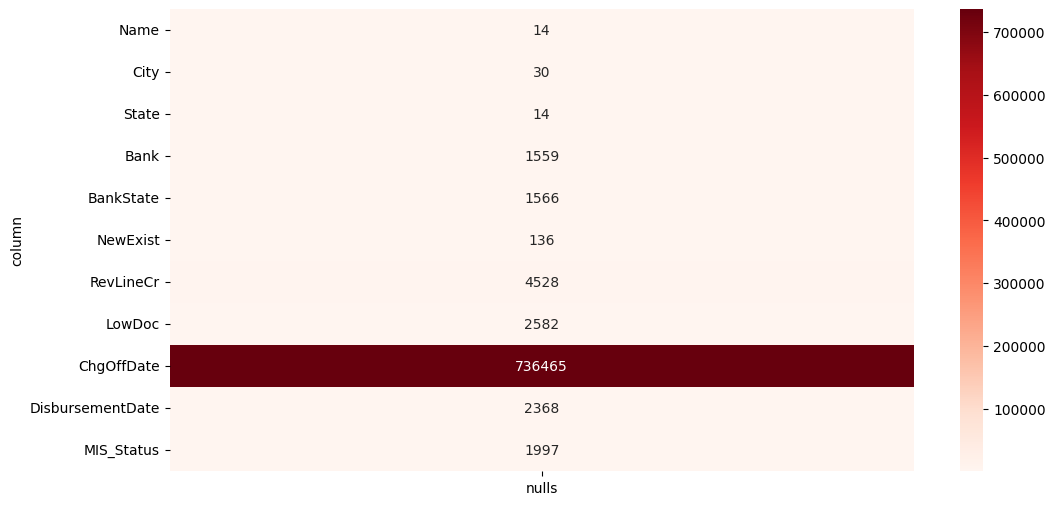

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(dfnull[['nulls']].set_index(dfnull['column']), annot=True, cmap="Reds",fmt="d")
plt.show()


In [10]:
round(df.describe(),2)

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,8.991640e+05,899164.00,899164.00,899164.00,899164.00,899028.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00,899164.00
mean,4.772612e+09,53804.39,398660.95,110.77,11.41,1.28,8.43,10.80,2753.73,0.76,201154.02,2.99,13503.30,192686.98,149488.79
std,2.538175e+09,31184.16,263318.31,78.86,74.11,0.45,236.69,237.12,12758.02,0.65,287640.85,1442.16,65152.29,283263.39,228414.56
min,1.000014e+09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00,100.00
25%,2.589758e+09,27587.00,235210.00,60.00,2.00,1.00,0.00,0.00,1.00,0.00,42000.00,0.00,0.00,35000.00,21250.00
50%,4.361439e+09,55410.00,445310.00,84.00,4.00,1.00,0.00,1.00,1.00,1.00,100000.00,0.00,0.00,90000.00,61250.00
75%,6.904627e+09,83704.00,561730.00,120.00,10.00,2.00,1.00,4.00,1.00,1.00,238000.00,0.00,0.00,225000.00,175000.00
max,9.996003e+09,99999.00,928120.00,569.00,9999.00,2.00,8800.00,9500.00,99999.00,2.00,11446325.00,996262.00,3512596.00,5472000.00,5472000.00


In [7]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

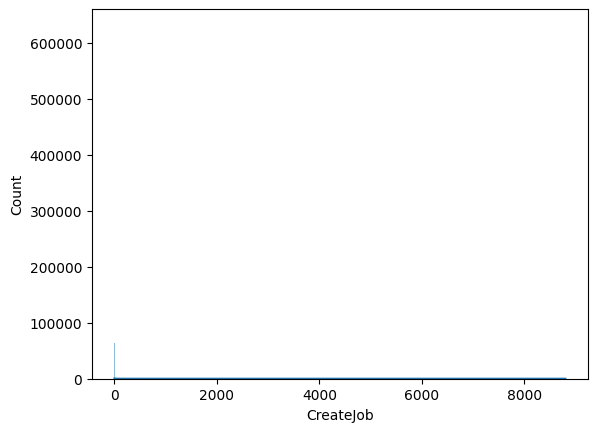

In [6]:

sns.histplot(df['CreateJob'], kde=True)
plt.show()


By States

In [21]:


df_grouped = df.groupby("State")[['ChgOffPrinGr']].mean().reset_index()

# Ahora sí podés graficar con choropleth
fig = px.choropleth(
    df_grouped,
    locations="State",        # columna con nombres de estados
    locationmode="USA-states",# para estados de USA
    color='ChgOffPrinGr',    # la primera columna numérica que quieras mapear
    scope="usa",
    color_continuous_scale="Turbo"
)

fig.update_layout(
    title_text="In which state people are less likely to pay off a loan?",
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="Debt in K"
    )
)
fig.show()


In [22]:
df_grouped.head(5)

,State,ChgOffPrinGr
0,AK,14957.746778
1,AL,13477.031930
2,AR,14640.620722
3,AZ,21085.519766
4,CA,13855.606604


In [23]:


df_jobcreator = df.groupby("State")[['CreateJob']].mean().reset_index()

# Ahora sí podés graficar con choropleth
fig = px.choropleth(
    df_jobcreator,
    locations="State",        # columna con nombres de estados
    locationmode="USA-states",# para estados de USA
    color='CreateJob',    # la primera columna numérica que quieras mapear
    scope="usa",
    color_continuous_scale="Turbo"
)

fig.update_layout(
    title_text="In which state are more Jobs being created by Loans?",
    title_x=0.5,
    coloraxis_colorbar=dict(
        title="New Created Jobs"
    )
)
fig.show()


In [3]:
df.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [ ]:
df_BalanceGross=df.query("ChgOffPrinGr > 0")
df_BalanceGross

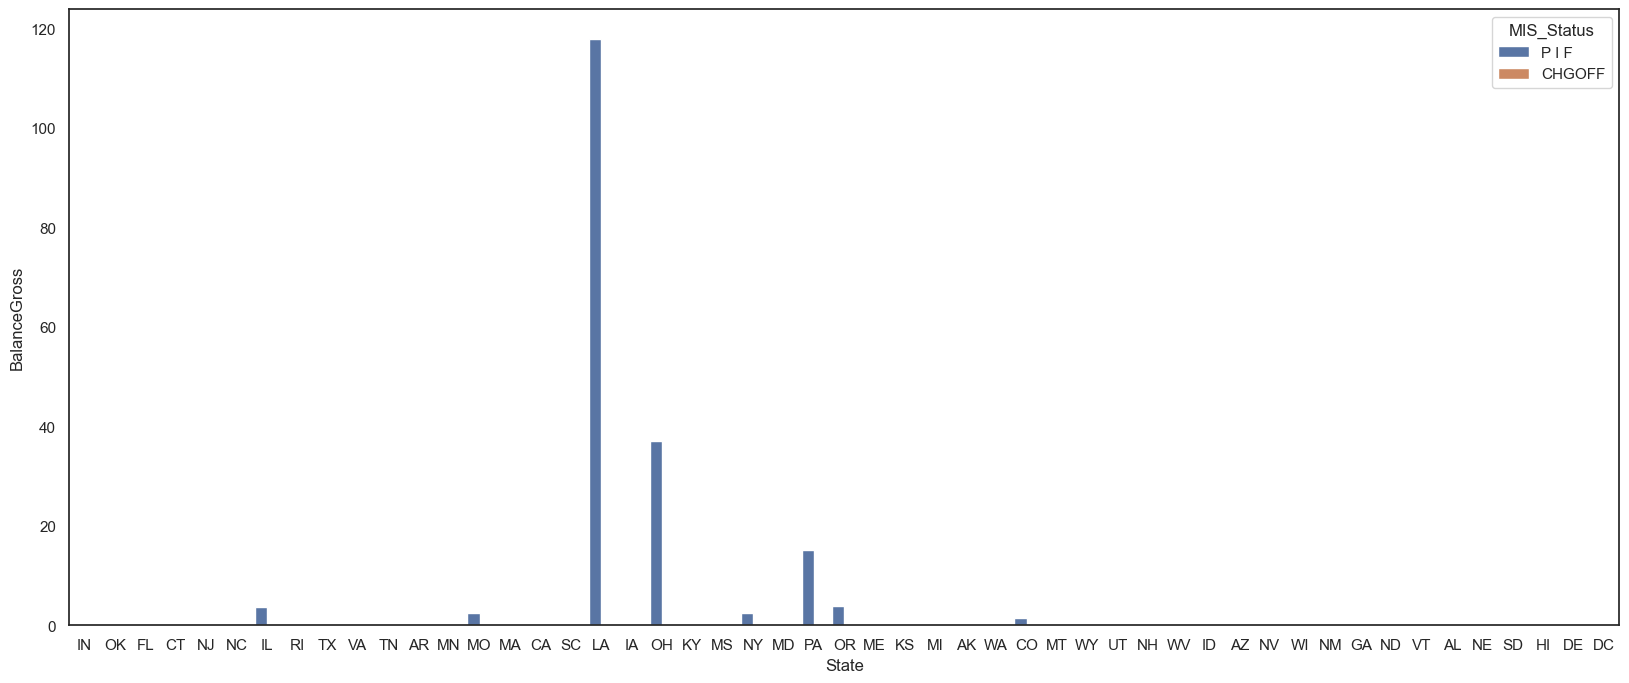

In [19]:

sns.set_theme(style="white")


plt.figure(figsize=(20, 8))

sns.barplot(x="State", y="BalanceGross", hue="MIS_Status", data=df, errorbar=None)

plt.show()

By Season, some of the chart have been splitted as a result of the amount of data of the data set

In [38]:
df.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,DisbursementDate_day,DisbursementDate_month,DisbursementDate_year,DisbursementDate_weekday,DisbursementDate_quarter,ApprovalDate_day,ApprovalDate_month,ApprovalDate_year,ApprovalDate_weekday,ApprovalDate_quarter,mean_GrAppv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997,84,4,2.0,0,0,1,0,N,Y,NaN,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade,28,2,1999,6,1,28,2,1997,4,1,192686.98
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,1997,60,2,2.0,0,0,1,0,N,Y,NaN,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services,31,5,1997,5,2,28,2,1997,4,1,192686.98
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997,180,7,1.0,0,0,1,0,N,N,NaN,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance,31,12,1997,2,4,28,2,1997,4,1,192686.98
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,NaN,35000.0,0.0,P I F,0.0,35000.0,28000.0,NaN,30,6,1997,0,2,28,2,1997,4,1,192686.98
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997,240,14,1.0,7,7,1,0,N,N,NaN,229000.0,0.0,P I F,0.0,229000.0,229000.0,NaN,14,5,1997,2,2,28,2,1997,4,1,192686.98


In [54]:
df_year = df.groupby("ApprovalDate_year")[['GrAppv']].mean().reset_index()
df_year.head(10)

,ApprovalDate_year,GrAppv
0,1969,74925.000000
1,1970,102797.894737
2,1971,136433.333333
3,1972,138807.608696
4,1973,175647.826087
5,1974,122834.687500
6,1975,136951.020408
7,1976,150461.363636
8,1977,191335.460993
9,1978,190638.148148


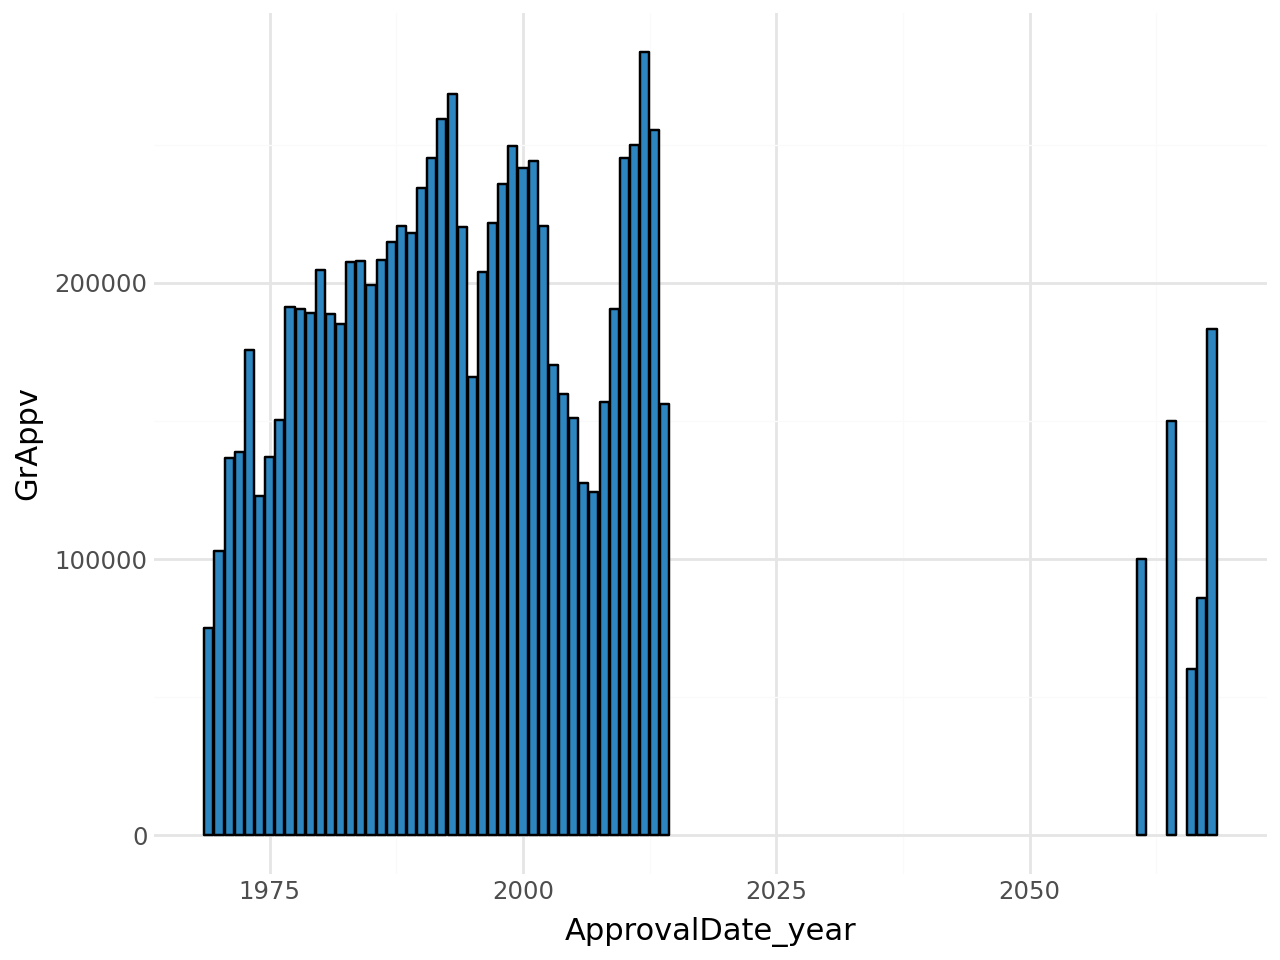

In [58]:

(
    ggplot(df_year, aes(x="ApprovalDate_year", y="GrAppv")) 
    + geom_bar(stat="identity", fill="#2E86C1", color="black") 
    + theme_minimal()
)

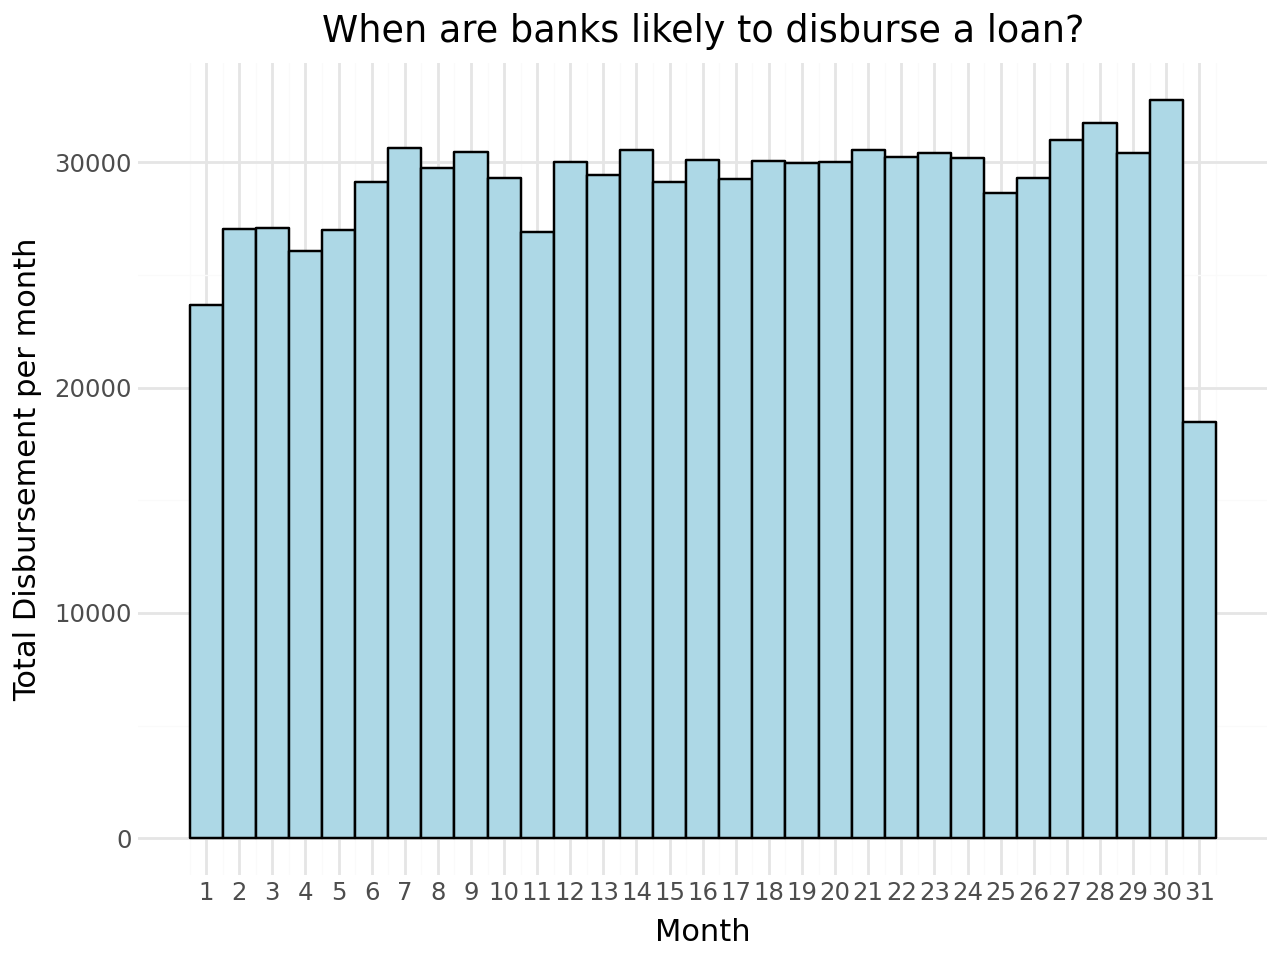

In [51]:
(
ggplot(df, aes(x='ApprovalDate_day')) +
    geom_histogram(bins=31, fill='lightblue', color='black') +
    labs(
    title="When are banks likely to disburse a loan?",
    # subtitle='Banks with 50 or more loans anually',
    x="Month",
    y="Total Disbursement per month")
    + theme_minimal()
    + scale_x_continuous(breaks=range(1, 32))
)

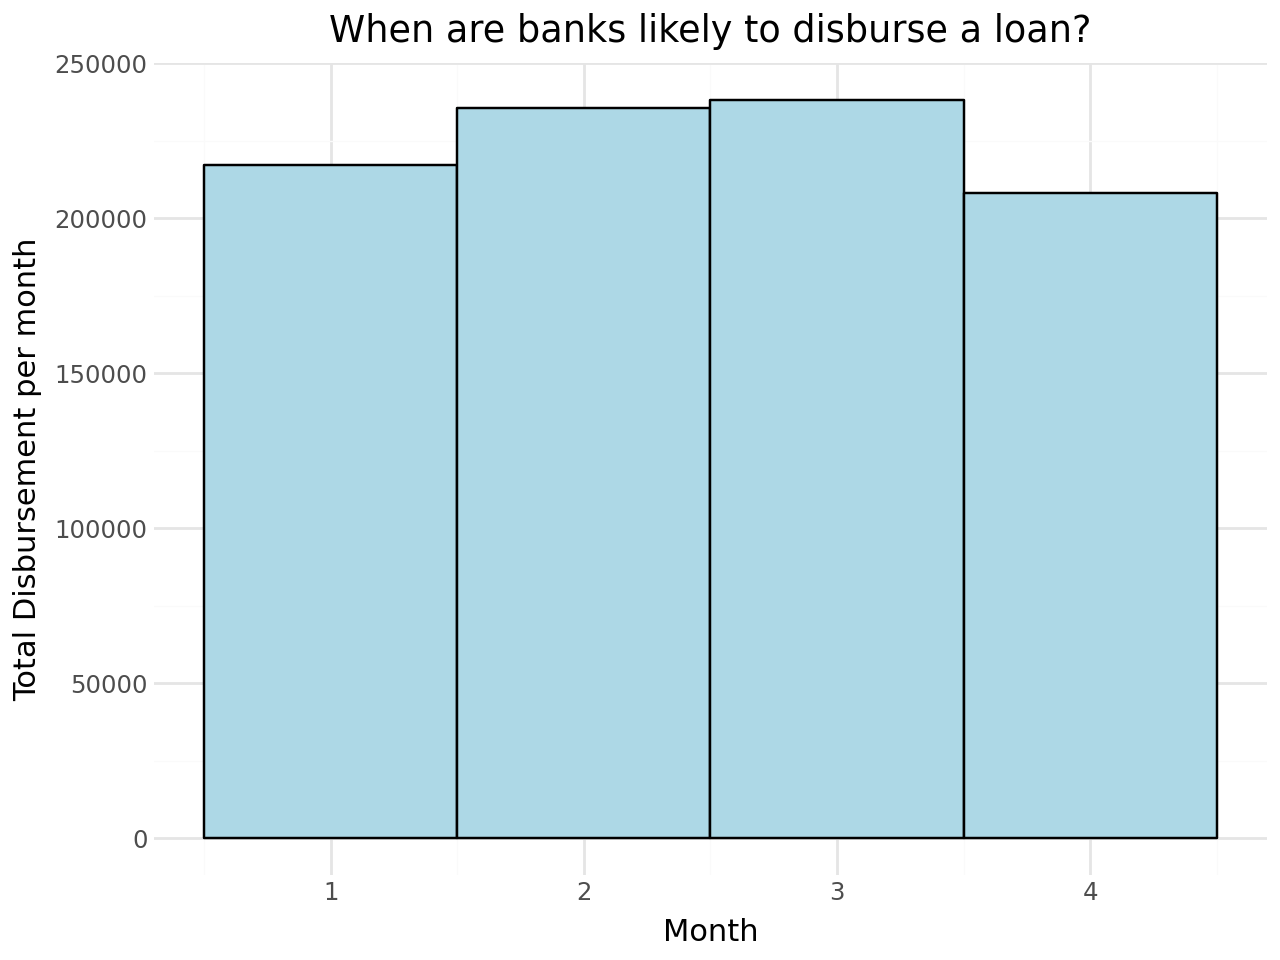

In [48]:
(
ggplot(df, aes(x='ApprovalDate_quarter')) +
    geom_histogram(bins=4, fill='lightblue', color='black') +
    labs(
    title="When are banks likely to disburse a loan?",
    # subtitle='Banks with 50 or more loans anually',
    x="Month",
    y="Total Disbursement per month")
    + theme_minimal()
    + scale_x_continuous(breaks=range(1, 5))
)

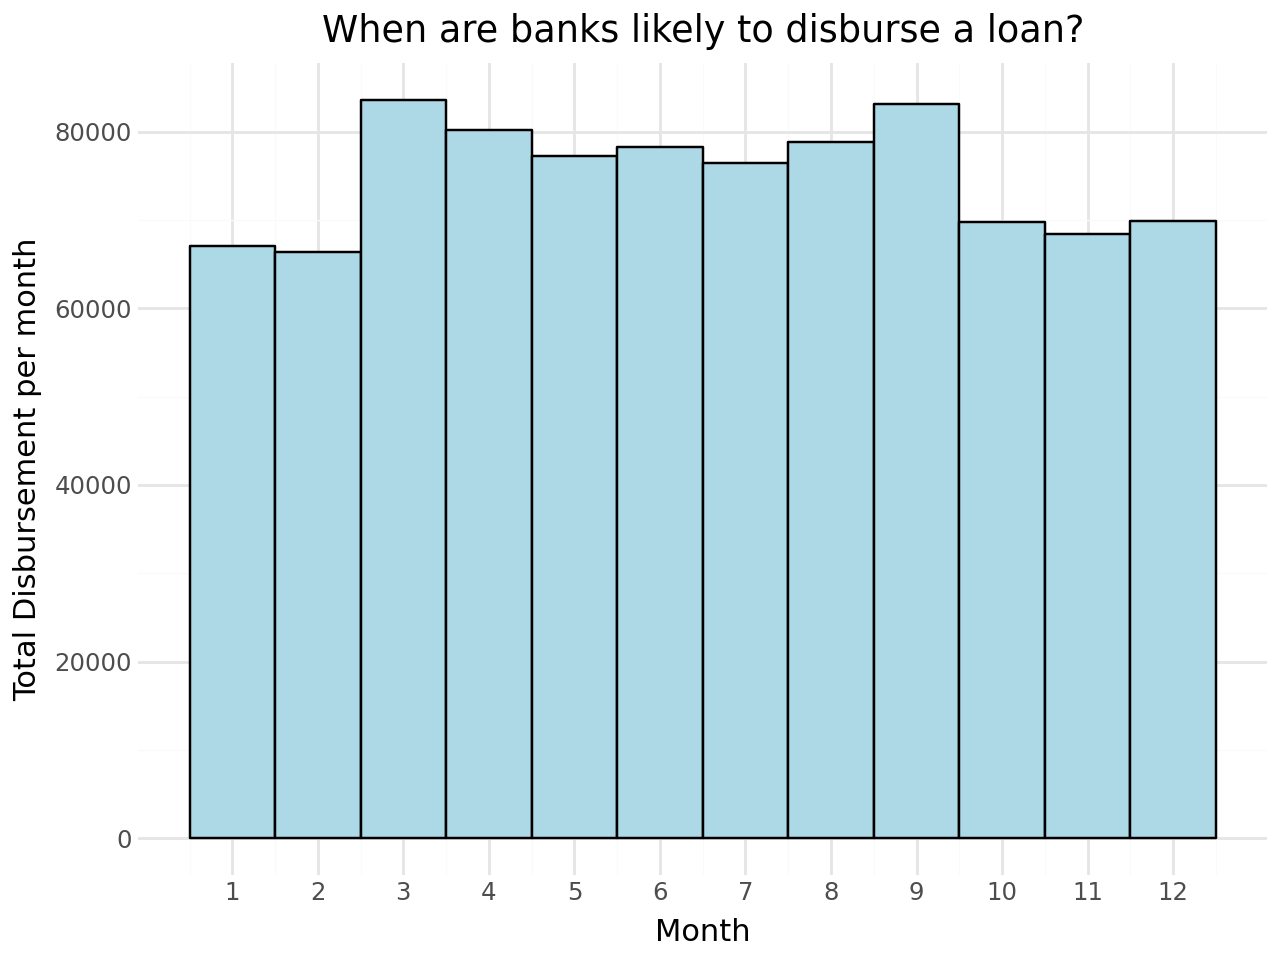

In [46]:
(
ggplot(df, aes(x='ApprovalDate_month')) +
    geom_histogram(bins=12, fill='lightblue', color='black') +
    labs(
    title="When are banks likely to disburse a loan?",
    # subtitle='Banks with 50 or more loans anually',
    x="Month",
    y="Total Disbursement per month")
    + theme_minimal()
    + scale_x_continuous(breaks=range(1, 13))
)

In [8]:
# Contar cuántas veces aparece cada banco
M50banks = df['Bank'].value_counts()

# Filtrar solo los que tienen al menos 50 ocurrencias
M50 = M50banks[M50banks >= 50].index

# Filtrar el DataFrame original para quedarse solo con esos bancos
df_M50banks = df[df['Bank'].isin(M50)]
df_M50banks.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,DisbursementDate_day,DisbursementDate_month,DisbursementDate_year,DisbursementDate_weekday,DisbursementDate_quarter,ApprovalDate_day,ApprovalDate_month,ApprovalDate_year,ApprovalDate_weekday,ApprovalDate_quarter
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997,84,4,2.0,0,0,1,0,N,Y,NaN,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade,28,2,1999,6,1,28,2,1997,4,1
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,1997,60,2,2.0,0,0,1,0,N,Y,NaN,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services,31,5,1997,5,2,28,2,1997,4,1
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997,60,2,1.0,0,0,1,0,N,Y,NaN,35000.0,0.0,P I F,0.0,35000.0,28000.0,NaN,30,6,1997,0,2,28,2,1997,4,1
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997,240,14,1.0,7,7,1,0,N,N,NaN,229000.0,0.0,P I F,0.0,229000.0,229000.0,NaN,14,5,1997,2,2,28,2,1997,4,1
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,33,1997,120,19,1.0,0,0,1,0,N,N,NaN,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing,30,6,1997,0,2,28,2,1997,4,1


In [24]:
df_M50banks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850146 entries, 0 to 899163
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LoanNr_ChkDgt             850146 non-null  int64  
 1   Name                      850132 non-null  object 
 2   City                      850120 non-null  object 
 3   State                     850135 non-null  object 
 4   Zip                       850146 non-null  int64  
 5   Bank                      850146 non-null  object 
 6   BankState                 850146 non-null  object 
 7   NAICS                     850146 non-null  object 
 8   ApprovalFY                850146 non-null  object 
 9   Term                      850146 non-null  int64  
 10  NoEmp                     850146 non-null  int64  
 11  NewExist                  850020 non-null  float64
 12  CreateJob                 850146 non-null  int64  
 13  RetainedJob               850146 non-null  int64 

In [9]:
df_sum = df_M50banks.groupby("DisbursementDate_month", as_index=False)["DisbursementGross"].sum()

In [10]:
df_sum['DisbursementGross'].sum()

np.float64(170674647715.0)

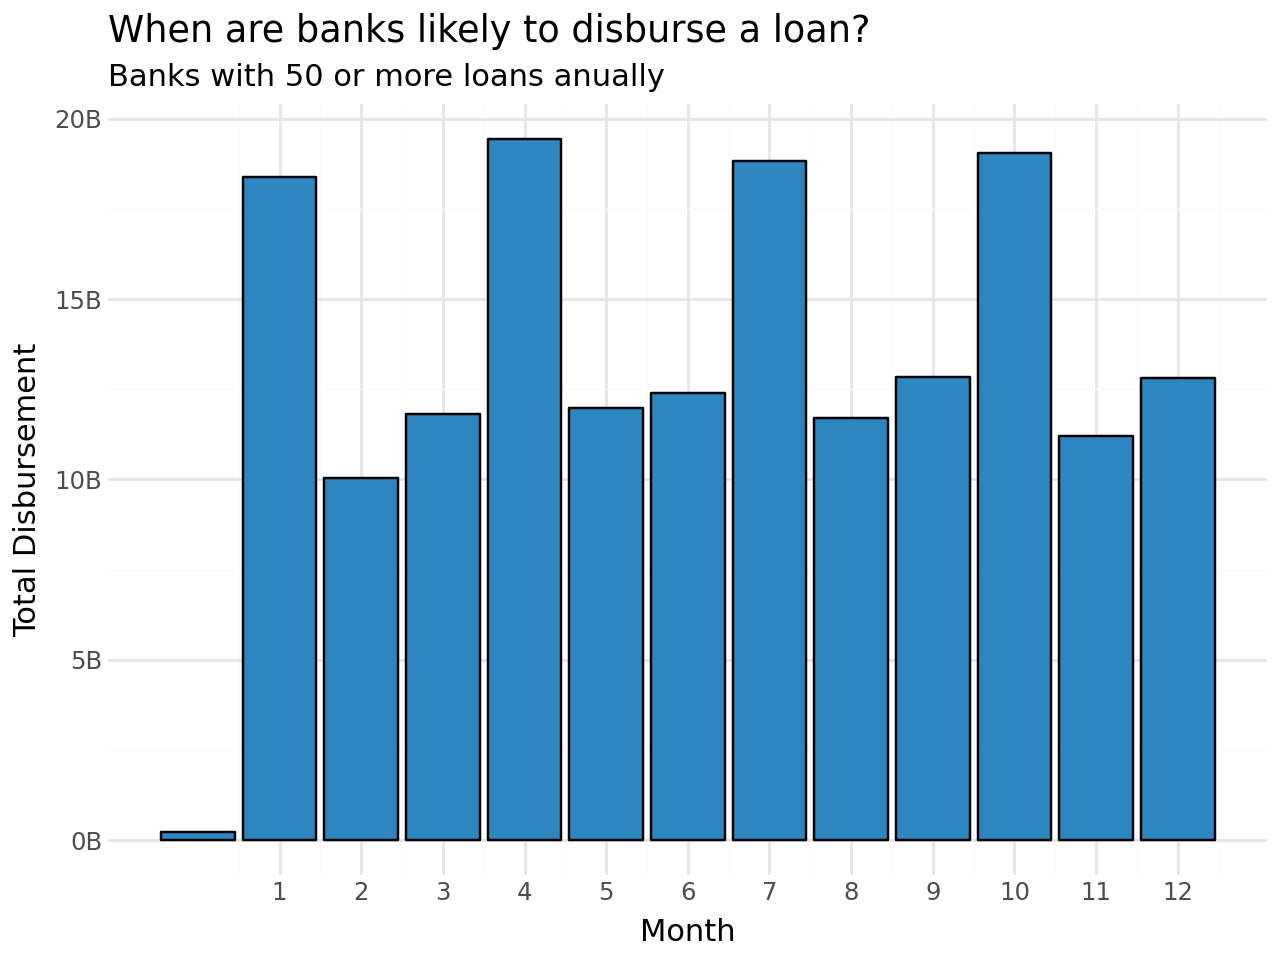

In [11]:

(
    ggplot(df_sum, aes(x="DisbursementDate_month", y="DisbursementGross")) 
    + geom_bar(stat="identity", fill="#2E86C1", color="black") 
    + labs(
        title="When are banks likely to disburse a loan?",
        subtitle='Banks with 50 or more loans anually',
        x="Month",
        y="Total Disbursement")
    + theme_minimal()
    + scale_x_continuous(breaks=range(1, 13))
    + scale_y_continuous(labels=lambda l: [f"{int(v/1e9)}B" for v in l])

)

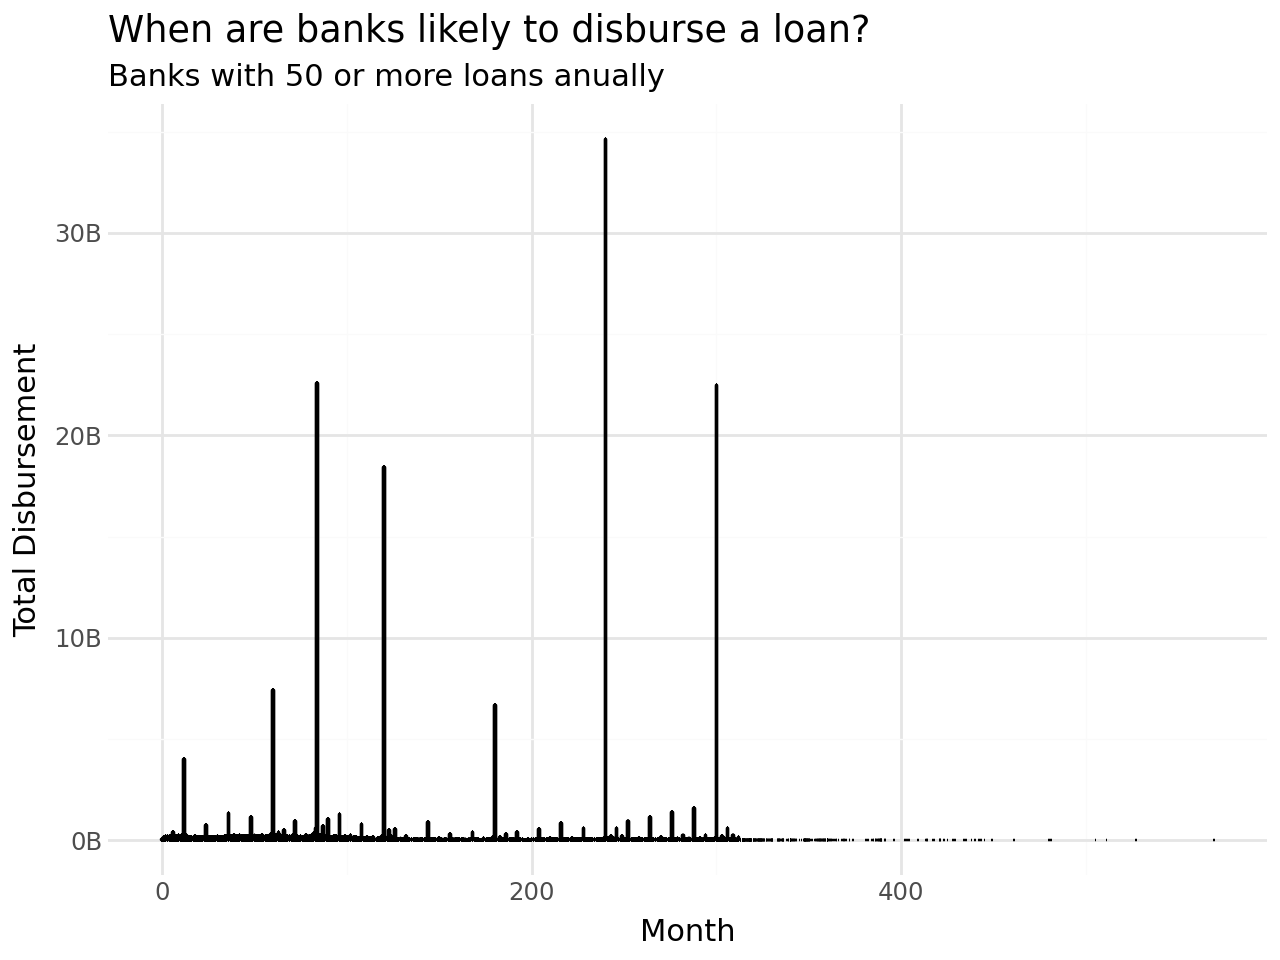

In [12]:
(
    ggplot(df_M50banks, aes(x="Term", y="DisbursementGross")) 
    + geom_bar(stat="identity", fill="#2E86C1", color="black") 
    + labs(
        title="When are banks likely to disburse a loan?",
        subtitle='Banks with 50 or more loans anually',
        x="Month",
        y="Total Disbursement")
    + theme_minimal()
    # + scale_x_continuous(breaks=range(1, 13))
    + scale_y_continuous(labels=lambda l: [f"{int(v/1e9)}B" for v in l])

)

In [48]:
# Contar cuántas veces aparece cada banco
L50banks = df['Bank'].value_counts()

# Filtrar solo los que tienen al menos 50 ocurrencias
L50 = L50banks[L50banks < 50].index

# Filtrar el DataFrame original para quedarse solo con esos bancos
df_L50banks = df[df['Bank'].isin(L50)]
df_L50banks.head(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,DisbursementDate_day,DisbursementDate_month,DisbursementDate_year,DisbursementDate_weekday,DisbursementDate_quarter,ApprovalDate_day,ApprovalDate_month,ApprovalDate_year,ApprovalDate_weekday,ApprovalDate_quarter
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997,180,7,1.0,0,0,1,0,N,N,NaN,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance,31,12,1997,2,4,28,2,1997,4,1
24,1000446006,SUBWAY,LITTLE ROCK,AR,72223,HOPE FCU,MS,72,2006,126,7,1.0,0,0,1,1,N,N,NaN,137300.0,0.0,P I F,0.0,137300.0,116705.0,Accommodation and food services,30,4,2006,6,2,7,2,2006,1,1
31,1000524003,AUDELIA FAMILY DENTAL GROUP,DALLAS,TX,75243,THE FROST NATIONAL BANK,TX,62,1997,102,12,1.0,0,0,1,0,N,N,NaN,600000.0,0.0,P I F,0.0,600000.0,450000.0,Health care and social assistance,31,7,1997,3,3,28,2,1997,4,1
33,1000534006,PPP COMMUNICATIONS,WASHINGTON,IA,52353,WASHINGTON STATE BANK,IA,45,1997,84,2,2.0,0,0,1,0,N,N,NaN,30000.0,0.0,P I F,0.0,30000.0,22500.0,Retail trade,31,10,1997,4,4,28,2,1997,4,1
143,1001236004,"LIQUID SUN COMPANY, LLC",BRANDON,FL,33511,THE BANK OF TAMPA,FL,71,2006,84,5,2.0,0,0,1,1,N,N,NaN,275000.0,0.0,P I F,0.0,275000.0,206250.0,"Arts, entertainment, and recreation",30,4,2006,6,2,7,2,2006,1,1


In [50]:
df_Lsum = df_L50banks.groupby("DisbursementDate_month", as_index=False)["DisbursementGross"].sum()

In [55]:
df_Lsum['DisbursementGross'].max()

np.float64(1182825953.0)

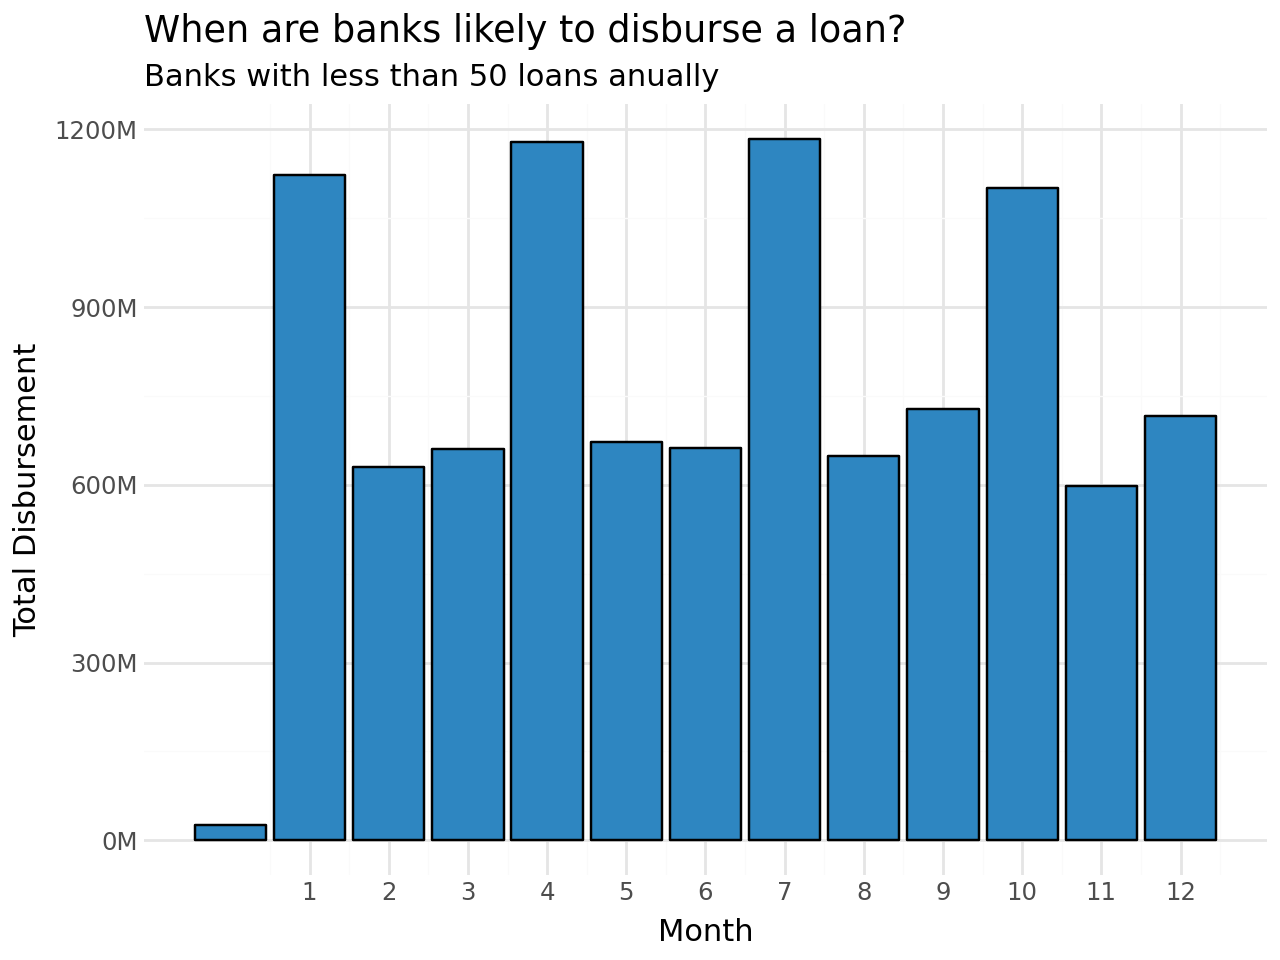

In [57]:

(
    ggplot(df_Lsum, aes(x="DisbursementDate_month", y="DisbursementGross")) 
    + geom_bar(stat="identity", fill="#2E86C1", color="black") 
    + labs(
        title="When are banks likely to disburse a loan?",
        subtitle='Banks with less than 50 loans anually',
        x="Month",
        y="Total Disbursement")
    + theme_minimal()
    + scale_x_continuous(breaks=range(1, 13))
    + scale_y_continuous(labels=lambda l: [f"{int(v/1e6)}M" for v in l])

)

In [14]:


def encode_categorical_columns(df):
    """
    Label encoding para columnas no numéricas o mixtas.
    Reemplaza nulos por "0" antes del encoding y elimina las columnas originales.
    """
    df_encoded = df.copy()
    categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

    for col in categorical_cols:
        le = LabelEncoder()
        # Reemplazamos nulos por "0" y convertimos todo a string
        df_encoded[col + '_token'] = le.fit_transform(
            df_encoded[col].fillna('0').astype(str)
        )
    
    # Eliminamos las columnas originales
    df_encoded = df_encoded.drop(columns=categorical_cols)

    return df_encoded


In [15]:
df_tokenized = encode_categorical_columns(df)


In [16]:
df_tokenized.head(5)

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Name_token,City_token,State_token,Bank_token,BankState_token,ApprovalFY_token,RevLineCr_token,LowDoc_token,ChgOffDate_token,MIS_Status_token,DisbursementDate_day_token,DisbursementDate_month_token,DisbursementDate_year_token,DisbursementDate_weekday_token,DisbursementDate_quarter_token,ApprovalDate_day_token,ApprovalDate_month_token,ApprovalDate_year_token,ApprovalDate_weekday_token,ApprovalDate_quarter_token
0,1000014003,47711,451120,84,4,2.0,0,0,1,0,60000.0,0.0,0.0,60000.0,48000.0,12792,8559,16,2144,39,34,12,7,0,2,21,5,31,6,1,20,4,28,4,0
1,1000024006,46526,722410,60,2,2.0,0,0,1,0,40000.0,0.0,0.0,40000.0,32000.0,405594,19589,16,133,19,34,12,7,0,2,25,8,29,5,2,20,4,28,4,0
2,1000034009,47401,621210,180,7,1.0,0,0,1,0,287000.0,0.0,0.0,287000.0,215250.0,759977,2207,16,2860,19,34,12,4,0,2,25,4,29,2,4,20,4,28,4,0
3,1000044001,74012,0,60,2,1.0,0,0,1,0,35000.0,0.0,0.0,35000.0,28000.0,83889,2721,37,26,40,34,12,7,0,2,24,9,29,0,2,20,4,28,4,0
4,1000054004,32801,0,240,14,1.0,7,7,1,0,229000.0,0.0,0.0,229000.0,229000.0,38544,21135,10,2684,12,34,12,4,0,2,6,8,29,2,2,20,4,28,4,0


In [18]:
df_tokenized.isnull().sum()


LoanNr_ChkDgt                       0
Zip                                 0
NAICS                               0
Term                                0
NoEmp                               0
NewExist                          136
CreateJob                           0
RetainedJob                         0
FranchiseCode                       0
UrbanRural                          0
DisbursementGross                   0
BalanceGross                        0
ChgOffPrinGr                        0
GrAppv                              0
SBA_Appv                            0
Name_token                          0
City_token                          0
State_token                         0
Bank_token                          0
BankState_token                     0
ApprovalFY_token                    0
RevLineCr_token                     0
LowDoc_token                        0
ChgOffDate_token                    0
MIS_Status_token                    0
DisbursementDate_day_token          0
Disbursement

In [10]:
df_tokenized['NewExist'].isnull()

NameError: name 'df_tokenized' is not defined

In [26]:
correlation_matrix = df.corr(numeric_only=True)

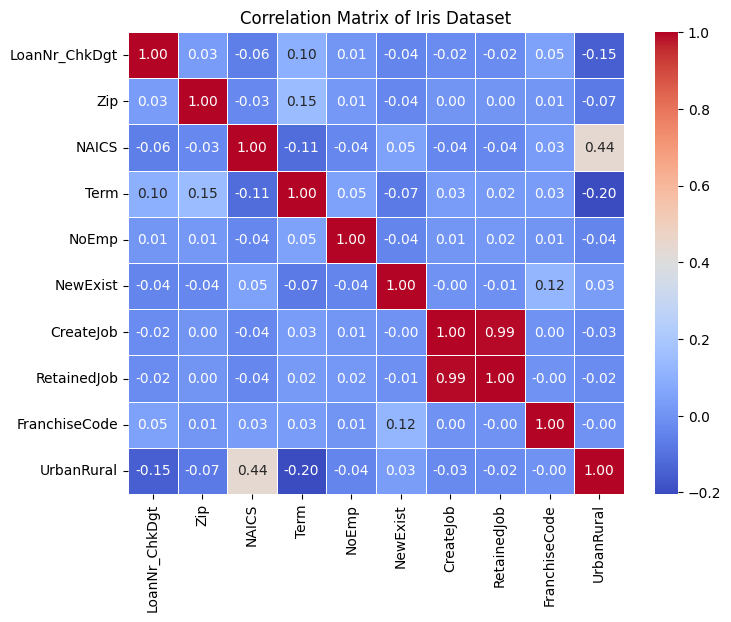

In [27]:
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()